In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
dataFile = r'S:\CookLab\Liu\20190816_organizedData_MCM_loading\sel_cells_20_50.csv'

In [4]:
myData = pd.read_csv(dataFile)

### Add useful transformations

In [5]:
# add physical time based on DHB length
myData['age_track'] = (myData.DHB_len - 1) *10 / 60

In [6]:
# add day of experiments (with 'd' because otherwise seaborn fails to recognize it as a category)
myData['day']=[f"d{x.split('_')[0]}" for x in myData.file]
myData = myData.astype({"day": 'object'})
set(myData['day'])

{'d20190506',
 'd20190607',
 'd20190609',
 'd20190625',
 'd20190701',
 'd201907012',
 'd201907016'}

In [7]:
myData.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,file,original cell name,Amy_mod,movie,x,y,ab1 (heterochromatin),...,hetChrom_50_volume,random_50_volume,hetChrom_50perc_ch1,random_50perc_ch1,hetChrom_50perc_ch2,random_50perc_ch2,hetChrom_50perc_ch3,random_50perc_ch3,age_track,day
0,0,0,0,20190625_cell-00.czi,7LE1(B),1130/10,190619-cdc6-dhb-pcna002xy09,172,956,HP1B,...,229928.0,230297.0,2.041326e+09,1.396604e+09,7.852669e+08,655128720.0,5.975119e+09,5.183896e+09,0.666667,d20190625
1,1,1,1,20190625_cell-01.czi,7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158,906,HP1B,...,218251.0,218330.0,1.914641e+09,1.320540e+09,7.534494e+08,635593517.0,6.021406e+09,5.288438e+09,0.666667,d20190625
2,2,2,2,20190625_cell-02.czi,7L-E2(B),0,190619-cdc6-dhb-pcna002xy09,832,252,HP1B,...,198493.0,198773.0,2.286151e+09,1.592549e+09,8.892584e+08,740026322.0,6.246416e+09,5.581327e+09,2.000000,d20190625
3,3,3,3,20190625_cell-03.czi,7L-E2(T),0,190619-cdc6-dhb-pcna002xy09,888,160,HP1B,...,210795.0,211242.0,2.102288e+09,1.447251e+09,8.562650e+08,703866878.0,5.932286e+09,5.249713e+09,2.000000,d20190625
4,4,4,4,20190625_cell-05.czi,7L-G2,0,190619-cdc6-dhb-pcna002xy09,172,324,HP1B,...,407099.0,406709.0,5.007347e+09,3.500901e+09,1.120887e+09,916255965.0,1.218062e+10,1.079789e+10,19.500000,d20190625


### Percentile volume test

We segmented the images by choosing n% of the brightest pixels in hetChrom channel (HP1B or H3K9Me3). Heterochromatin defined in this way should constitute n% volume of the nucleus.

<IPython.core.display.Javascript object>


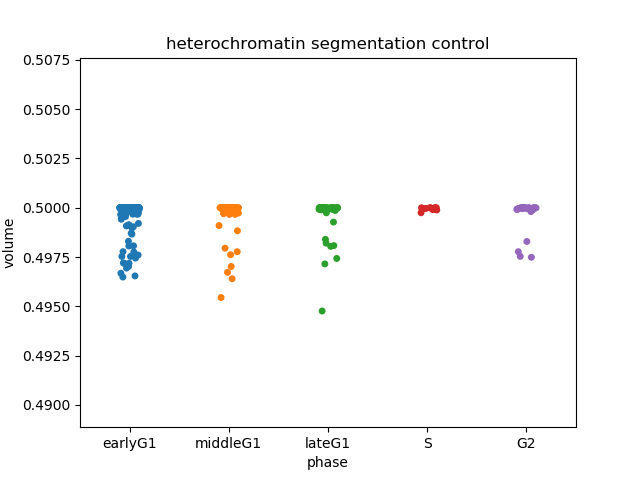

Text(0.5, 1.0, 'heterochromatin segmentation control')

In [10]:
%matplotlib notebook

myData['temp']=myData.hetChrom_50_volume/myData.nucleus_Otsu_volume
sn.stripplot(x='category', y = 'temp', data=myData,order=[ "earlyG1", "middleG1", "lateG1","S","G2"])
plt.ylabel("volume")
plt.xlabel("phase")
plt.title("heterochromatin segmentation control")

Control masks were generated by choosing n% of random pixels within a nucleus.

<IPython.core.display.Javascript object>


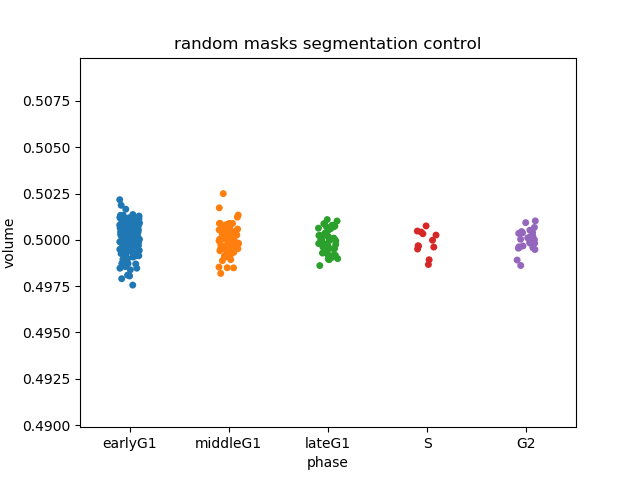

Text(0.5, 1.0, 'random masks segmentation control')

In [12]:
%matplotlib notebook

myData['temp']=myData.random_50_volume/myData.nucleus_Otsu_volume
sn.stripplot(x='category', y = 'temp', data=myData,order=[ "earlyG1", "middleG1", "lateG1","S","G2"])
plt.ylabel("volume")
plt.xlabel("phase")
plt.title("random masks segmentation control")

### Density loading vs molecular age

In [ ]:
%matplotlib notebook

myData['temp']=myData.nucleus_Otsu_ch2/myData.nucleus_Otsu_ch3
sn.stripplot(x='category', y = 'temp', data=myData.loc[((myData.decon==False) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B')),:],order=[ "earlyG1", "middleG1", "lateG1","S","G2"])
plt.ylabel("MCM/DAPI")
plt.xlabel("phase")
plt.title("not deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=myData.nucleus_Otsu_ch2/myData.nucleus_Otsu_ch3
sn.stripplot(x='category', y = 'temp', data=myData.loc[myData.decon==True,:],order=[ "earlyG1", "middleG1", "lateG1","S","G2"])
plt.ylabel("MCM/DAPI")
plt.xlabel("phase")
plt.title("deconvolved")

### 20% brightest pixels in hetChrom

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch3/myData.nucleus_Otsu_ch3)/(myData.hetChrom_20_volume/myData.nucleus_Otsu_volume)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                        (['G1' in x for x in myData.category])),:],hue='category')
plt.ylabel("DAPI density in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.nucleus_Otsu_ch2)/(myData.hetChrom_20perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                        (['G1' in x for x in myData.category])),:],hue='category')
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.nucleus_Otsu_ch2)/(myData.hetChrom_20perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                                    (myData.day!='d20190625') &
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                        (['G1' in x for x in myData.category])),:],hue='category')
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.nucleus_Otsu_ch2)/(myData.hetChrom_20perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='age_track', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                        (['G1' in x for x in myData.category])),:],hue='category')
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("physical age")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.nucleus_Otsu_ch2)/(myData.hetChrom_20perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='age_track', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                           (myData.day!='d20190625') &
                                                        (['G1' in x for x in myData.category])),:],hue='exp')
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("physical age")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.nucleus_Otsu_ch2)/(myData.hetChrom_20perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='age_track', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                           (myData.day!='d20190625') &
                                                           (myData.day!='d201907012') &
                                                        (['G1' in x for x in myData.category])),:],hue='category')
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("physical age")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.nucleus_Otsu_ch2)/(myData.hetChrom_20perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                           (myData.day!='d20190625') &
                                                           (myData.day!='d201907012') &
                                                        (['G1' in x for x in myData.category])),:],hue='category')
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("physical age")
plt.title("deconvolved")

If physical age below xh (2h) - DHB measurement unreliable, change 

In [ ]:
myData['mol_age_mod']=myData.molecularAge_ratio
myData.loc[((myData.age_track<2) & (myData.category=='earlyG1')),'mol_age_mod']=0.3

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.nucleus_Otsu_ch2)/(myData.hetChrom_20perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                           (myData.day!='d20190625') &
                                                           (myData.day!='d201907012') &
                                                        (['G1' in x for x in myData.category])),:],hue='category')

plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")
plt.legend(loc='lower right')

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.nucleus_Otsu_ch2)/(myData.hetChrom_20perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                           (myData.day!='d20190625') &
                                                           (myData.day!='d201907012') &
                                                        (['G1' in x for x in myData.category])),:],hue='category')

plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")
plt.legend(loc='lower right')

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.nucleus_Otsu_ch2)/(myData.hetChrom_20perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myData.loc[((myData.decon==False) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                           (myData.day!='d20190625') &
                                                           (myData.day!='d201907012') &
                                                        (['G1' in x for x in myData.category])),:],hue='category')

plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")
plt.legend(loc='lower right')

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.nucleus_Otsu_ch2)/(myData.hetChrom_20perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                           (myData.day!='d20190625') &
                                                           (myData.day!='d201907012')),:],hue='category')

plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")
plt.legend(loc='lower right')

In [ ]:
len(myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B') & (myData.day!='d20190625') &
                                                           (myData.day!='d201907012') &(['G1' in x for x in myData.category])),:])

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                           (myData.day!='d20190625') &
                                                           (myData.day!='d201907012') &
                                                        (['G1' in x for x in myData.category])),:],hue='category')

plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")
plt.legend(loc='best')

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_50perc_ch2/myData.nucleus_Otsu_ch2)/(myData.hetChrom_50perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                           (myData.day!='d20190625') &
                                                           (myData.day!='d201907012') &
                                                        (['G1' in x for x in myData.category])),:],hue='category')

plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")
plt.legend(loc='lower right')

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_50perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                           (myData.day!='d20190625') &
                                                           (myData.day!='d201907012') &
                                                        (['G1' in x for x in myData.category])),:],hue='category')

plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")
plt.legend(loc='best')

In [ ]:
%matplotlib notebook

myData['temp']=(myData.random_20perc_ch2/myData.nucleus_Otsu_ch2)/(myData.random_20perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                           (myData.day!='d20190625') &
                                                           (myData.day!='d201907012') &
                                                        (['G1' in x for x in myData.category])),:],hue='category')

plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")
plt.legend(loc='lower right')

In [ ]:
%matplotlib notebook

myData['temp']=(myData.random_50perc_ch2/myData.nucleus_Otsu_ch2)/(myData.random_50perc_ch3/myData.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                           (myData.day!='d20190625') &
                                                           (myData.day!='d201907012') &
                                                        (['G1' in x for x in myData.category])),:],hue='category')

plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")
plt.legend(loc='lower right')

In [ ]:
test=myData.loc[myData.category=='lateG1',:]
test.sort_values('mol_age_mod')

In [ ]:
test.loc[58,:]

In [ ]:
myData.

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.hetChrom_20perc_ch3)/(myData.nucleus_Otsu_ch2/myData.nucleus_Otsu_ch3)
sn.stripplot(x='category', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') &
                                                        (myData.day!='d20190625') &
                                                        (['G1' in x for x in myData.category])),:],order=[ "earlyG1", "middleG1", "lateG1"])
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.hetChrom_20perc_ch3)/(myData.nucleus_Otsu_ch2/myData.nucleus_Otsu_ch3)
sn.stripplot(x='day', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                        (['G1' in x for x in myData.category])),:],hue='category')
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("exp")
plt.xticks(rotation='vertical')
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.hetChrom_20perc_ch3)/(myData.nucleus_Otsu_ch2/myData.nucleus_Otsu_ch3)
sn.stripplot(x='category', y = 'temp', data=myData.loc[((myData.decon==False) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                        (['G1' in x for x in myData.category])),:],order=[ "earlyG1", "middleG1", "lateG1"])
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("not deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.hetChrom_20_volume)/(myData.nucleus_Otsu_ch2/myData.nucleus_Otsu_volume)
sn.stripplot(x='category', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                        (['G1' in x for x in myData.category])),:],order=[ "earlyG1", "middleG1", "lateG1"])
plt.ylabel("MCM density in hetChrom vs MCM density in the nucleus")
plt.xlabel("molecular age")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.random_20perc_ch2/myData.random_20_volume)/(myData.nucleus_Otsu_ch2/myData.nucleus_Otsu_volume)
sn.stripplot(x='category', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                        (['G1' in x for x in myData.category])),:],order=[ "earlyG1", "middleG1", "lateG1"])
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.random_20perc_ch2/myData.nucleus_Otsu_ch2)/(myData.random_20perc_ch3/myData.nucleus_Otsu_ch3)
sn.stripplot(x='category', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                        (['G1' in x for x in myData.category])),:],order=[ "earlyG1", "middleG1", "lateG1"])
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=((myData.nucleus_Otsu_ch2-myData.hetChrom_20perc_ch2)/myData.nucleus_Otsu_ch2)/((myData.nucleus_Otsu_ch3-myData.hetChrom_20perc_ch3)/myData.nucleus_Otsu_ch3)
sn.stripplot(x='category', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                        (['G1' in x for x in myData.category])),:],order=[ "earlyG1", "middleG1", "lateG1"])
plt.ylabel("MCM/DAPI in euchromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_20perc_ch2/myData.nucleus_Otsu_ch2)/(myData.hetChrom_20_volume/myData.nucleus_Otsu_volume)
sn.violinplot(x='category', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                        (['G1' in x for x in myData.category])),:],order=[ "earlyG1", "middleG1", "lateG1"])
plt.ylabel("MCM density in heterochromatin pixels")
plt.xlabel("molecular age")
plt.title("deconvolved")

### 50% brightest pixels in hetChrom

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_50perc_ch2/myData.hetChrom_50perc_ch3)/(myData.nucleus_Otsu_ch2/myData.nucleus_Otsu_ch3)
sn.stripplot(x='category', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B')),:],order=[ "earlyG1", "middleG1", "lateG1","S","G2"])
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("phase")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_50perc_ch2/myData.hetChrom_50perc_ch3)/(myData.nucleus_Otsu_ch2/myData.nucleus_Otsu_ch3)
sn.stripplot(x='day', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']=='HP1B') & 
                                                        (['G1' in x for x in myData.category])),:],hue='category')
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("exp")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=(myData.hetChrom_50perc_ch2/myData.hetChrom_50perc_ch3)/(myData.nucleus_Otsu_ch2/myData.nucleus_Otsu_ch3)
sn.stripplot(x='category', y = 'temp', data=myData.loc[((myData.decon==True) & 
                                                         (myData['ab1 (heterochromatin)']!='HP1B')),:],order=[ "earlyG1", "middleG1", "lateG1","S","G2"])
plt.ylabel("MCM/DAPI in heterochromatin pixels")
plt.xlabel("phase")
plt.title("deconvolved")

In [ ]:
%matplotlib notebook

myData['temp']=myData.hetChrom_5perc_ch1/myData.nucleus_Otsu_ch1
sn.stripplot(x='category', y = 'temp', data=myData.loc[myData.decon==True,:],order=[ "earlyG1", "middleG1", "lateG1","S","G2"])
plt.ylabel("MCM hetChrom")
plt.xlabel("phase")
plt.title("deconvolved")

#fig.savefig(f'{final_dest}\\physical_hr_vs_raw_Het_v1.png', bbox_inches='tight')

In [ ]:

fig, plot3_mol_raw = plt.subplots()
plot3_mol_raw = sns.barplot(x=x_axis2, y=y_axis1_1, ci = None)
plt.ylabel("heterochromatin in MCM")
plt.xlabel("molecular age")
plt.title("molecular age vs heterochromatin in MCM (10%)")
sns.despine()
plt.xticks(rotation=90)
for ind, label in enumerate(plot3_mol_raw.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
#fig.savefig(f'{final_dest}\\molecular_vs_raw_Het_v1.png', bbox_inches='tight')

In [ ]:
sns.barplot(x=x_axis2, y = y_axis1_1, ci = None)
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 2 # inch margin
s = maxsize/plt.gcf().dpi*10+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=2.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.xticks(rotation=90)
plt.ylabel("heterochromatin")
plt.xlabel("molecular age")
plt.title("molecular age vs heterochromatin")
sns.despine()
plt.savefig(f'{final_dest}\\molecular_vs_raw_Het_v2.png', bbox_inches='tight')

### normalized - 10%  het in MCM (molecular age)

In [ ]:
fig, plot4_mol_normal = plt.subplots()
plot4_mol_normal=sns.barplot(x=x_axis2, y=y_axis2_1, ci = None)
plt.ylabel("normalized heterochromatin")
plt.xlabel("molecular age")
plt.title("molecular age vs normalized heterochromatin")
sns.despine()
plt.xticks(rotation=90)
for ind, label in enumerate(plot4_mol_normal.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
fig.savefig(f'{final_dest}\\molecular_vs_normaliazed_Het_v1.png', bbox_inches='tight')

In [ ]:
sns.barplot(x=x_axis2, y = y_axis2_1, ci = None)
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 2 # inch margin
s = maxsize/plt.gcf().dpi*10+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=2.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.xticks(rotation=90)
plt.ylabel("normalized heterochromatin")
plt.xlabel("molecular age")
plt.title("molecular age vs normalized heterochromatin")
sns.despine()
plt.savefig(f'{final_dest}\\molecular_vs_normalized_Het_v2.png', bbox_inches='tight')

In [ ]:
sns.violinplot(x="category", y="hetChrom_10_total_ch2", data=data)
plt.ylabel("heterochromatin")
plt.xlabel("category of stages")
plt.title("distribution of heterochromatin in MCM by stages (10%)")
sns.despine()
plt.savefig(f'{final_dest}\\distribution_of_Het_by_category.png')